In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [311]:
incline = 0.2
p_const = 9.8
sigm_d = 0.05
sec_sigm = 0.5
ro = 1.21
r = 8.31
T = 293
muu = 29 * 10 ** -3
lambd = 10 ** (-7)
D = [3.85, 5.25]

#50mm,thin
M1 = [ (14, (1, 52)),(37, (1, 21)), (43,(1,18)), (62, (3, 40)), (82, (3, 32)), (100, (4, 38)), (161, (5, 40)), (179, (5, 38))]
# (43,(2,32)), (55,(2, 26))
thin_len = [11, 30, 40, 50]

M_thin = [[(56,(3,40)), (40,(3,39)), (50,(3,39)), (62,(3,40))],[(83,(3,31)), (59,(3,30)), (70,(3,30)), (92,(3,31))]]

M_fat = [ 52,29,44,50]

fat_len  = [10.5, 30, 40, 50]

#fat, 50mm
M2 = [(20,(2,25)), (29,(4,33)), (42,(3,22)), (51,(5,33)), (60,(5,31))]

#fat, 30mm
M3 = [(13,(5,67)),(20,(5,42)),(25,(5,36)), (31,(5,32)), (35,(5,30))]

#fat, then thin
like_thin = [60,105,140,190]
like_fat = [30,55,74,109]


In [343]:
def mnk_val(x,y):
    x = np.array(x)
    y = np.array(y)
    t = (x*y).mean() - x.mean()*y.mean()
    b = (x*x).mean() - x.mean()**2
    t = float(t)
    b = float(b)
    return t/b

def err(x,y,k):
    x = np.array(x)
    y = np.array(y)
    t = (y*y).mean() - y.mean()**2
    b = (x*x).mean() - x.mean()**2
    t = float(t)
    b = float(b)
    return sqrt((t/b - k*k)/len(x))

def mnk_b(x,y,k):
    x = np.array(x)
    y = np.array(y)
    return y.mean() - k*x.mean()

def draw(x,y,label):
    plt.figure(figsize=(10,7))
    plt.title(label)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\Delta P$')
    plt.plot(x,y,'o-',color='r')
    plt.show()

In [338]:
def calc_all(M, lend, d,lnx,lb):
    Q_little_lam = [x[1][0]/x[1][1] for x in M]
    k = []
    q_l = [x[1][0]/x[1][1] for x in M[:lnx]]
    dp_l = [x[0] for x in M[:lnx]]
    k_m = mnk_val(q_l, dp_l)
    b_m = mnk_b(q_l, dp_l, k_m)
    print(k_m,b_m)
    errg_M1 = [x[1][0]*sec_sigm/x[1][1]**2 for x in M]
    errv_M1 = np.ones(len(M))
    # print(errg_M1)
    plt.figure(figsize=(12,8))
    plt.plot(Q_little_lam[:lnx] + [np.max(Q_little_lam)], [k_m*x + b_m for x in Q_little_lam[:lnx]] + [np.max(Q_little_lam) * k_m + b_m], 'b')
    plt.errorbar(Q_little_lam,[x[0] for x in M], xerr=errg_M1, yerr=errv_M1,fmt='o')
    plt.plot(Q_little_lam,[x[0] for x in M],'ro')
    plt.xlabel(r'$\frac{Q}{\Delta t}$', fontsize=15)
    plt.ylabel(r'$\Delta P$',fontsize=15)
    plt.title(lb,fontsize=15)
    plt.grid(True)
    plt.show()

    scal = 10 ** (-12) / (10 ** (-2)) * 9.8 *0.2 / 10**(-3)
    mu_air_thin = np.pi * (d/2) ** 4/(8 * lend) * np.mean([x[0] * x[1][1] / x[1][0] for x in M[:lnx]]) * scal
    mu_air_thin_sigma = mu_air_thin * np.sqrt(16 * (sigm_d/(d))**2 + (0.1/lend)**2 + (sec_sigm/np.min([x[1][1] for x in M]))**2)
    print('mu: ', round(mu_air_thin,7))
    print('sigma_mu: ', round(mu_air_thin_sigma,7))
    print('eps_mu: ', round(mu_air_thin_sigma/mu_air_thin * 100,0))
    print('bounds: ', round(mu_air_thin - mu_air_thin_sigma,8), round(mu_air_thin + mu_air_thin_sigma,8))
    print('errs:')
    print('errd: ', 4*sigm_d/(d/2))
    print('errlen: ', 0.1/lend)
    print('errQ: ',sec_sigm/np.min([x[1][1] for x in M]))
    q_cr = M[lnx-1][1][0]/M[lnx-1][1][1]
    r = d/2
    Re_cr = ro * q_cr/(mu_air_thin * np.pi * r)
    print('Re ~ ', round(Re_cr,0))

985.1454936369297 -8.75498811989


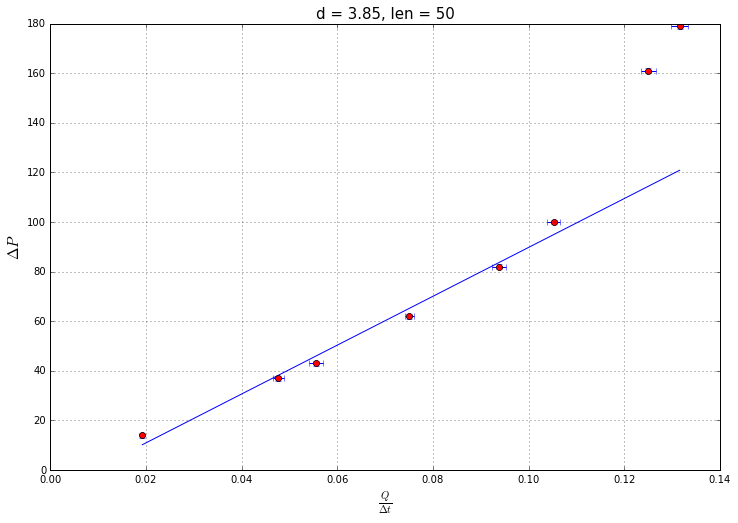

mu:  1.74e-05
sigma_mu:  1e-06
eps_mu:  6.0
bounds:  1.635e-05 1.839e-05
errs:
errd:  0.1038961038961039
errlen:  0.002
errQ:  0.0277777777778
Re ~  1213.0


In [347]:
calc_all(M1, thin_len[3], D[0], 6, 'd = 3.85, len = 50')

In [128]:
#\mu_theory = 1.78·10−5 T = 15 C

354.1480788602673 -9.51726867175


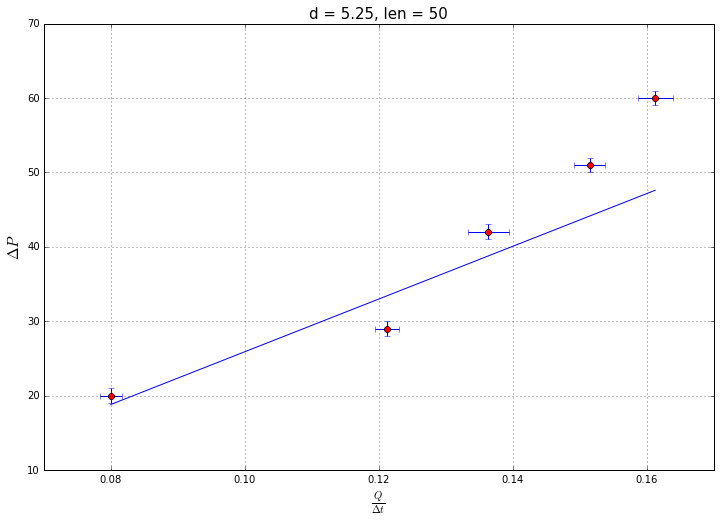

mu:  1.94e-05
sigma_mu:  9e-07
eps_mu:  4.0
bounds:  1.856e-05 2.029e-05
errs:
errd:  0.0761904761904762
errlen:  0.002
errQ:  0.0227272727273
Re ~  1030.0


In [350]:
calc_all(M2,fat_len[3],D[1],3,'d = 5.25, len = 50')

181.836107886282 -0.824009827479


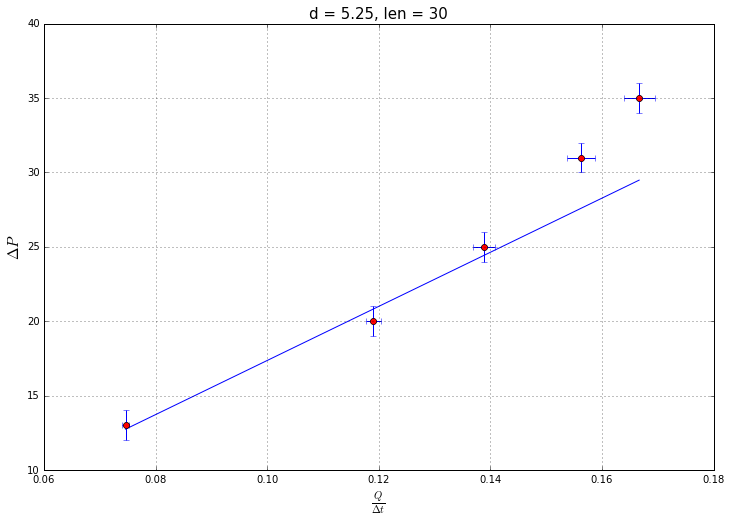

mu:  2.12e-05
sigma_mu:  9e-07
eps_mu:  4.0
bounds:  2.032e-05 2.209e-05
errs:
errd:  0.0761904761904762
errlen:  0.0033333333333333335
errQ:  0.0166666666667
Re ~  961.0


In [351]:
calc_all(M3,fat_len[1],D[1],3,'d = 5.25, len = 30') # заведомо турбулентый участок

In [ ]:
# он в прошлый раз сказал что если точек мало то мнк юзать не надо, поэтому я просто усреднил искомый параметр

In [290]:
v_t = np.sqrt(3*r*T/muu)
mu_th = 1/3 * lambd * v_t * ro
print('mu_th ~ : ', round(mu_th,7))

mu_th ~ :  2.02e-05


In [365]:
thin_sum = [thin_len[0]]
M_thin1_P = [M_thin[0][0][0]]
M_thin2_P = [M_thin[1][0][0]]
M_fat_P = [M_fat[0]]
fat_sum = [fat_len[0]]
sg = []
for i in range(1,4):
    thin_sum.append(thin_sum[i-1] + thin_len[i])
    fat_sum.append(fat_sum[i-1] + fat_len[i])
    M_thin1_P.append(M_thin[0][i][0] + M_thin1_P[i-1]) 
    M_thin2_P.append(M_thin[1][i][0] + M_thin2_P[i-1])
    M_fat_P.append(M_fat_P[i-1] + M_fat[i])
print(thin_sum, fat_sum)
print(M_thin1_P, M_thin2_P, M_fat_P)
sg.append(np.std([(M_fat_P[i+1]-M_fat_P[i])/(fat_len[i+1]) for i in range(3)])/np.mean([(M_fat_P[i+1]-M_fat_P[i])/(fat_len[i+1]) for i in range(3)]))
sg.append(np.std([(M_thin1_P[i+1]-M_thin1_P[i])/(thin_len[i+1]) for i in range(3)])/np.mean([(M_thin1_P[i+1]-M_thin1_P[i])/thin_len[i+1] for i in range(3)]))
sg.append(np.std([(like_fat[i+1] - like_fat[i])/fat_len[i+1] for i in range(3)])/np.mean([(like_fat[i+1] - like_fat[i])/fat_len[i+1] for i in range(3)]))
sg.append(np.std([(like_thin[i+1] - like_thin[i])/thin_len[i+1] for i in range(3)])/np.mean([(like_thin[i+1] - like_thin[i])/thin_len[i+1] for i in range(3)]))
# sg.append(np.std([M_fat_P[i]/fat_sum[i] for i in range(4)]))
# sg.append(np.std([M_thin1_P [i]/thin_sum[i] for i in range(4)]))
# sg.append(np.std([like_fat[i]/fat_sum[i] for i in range(4)]))
# sg.append(np.std([like_thin[i]/thin_sum[i] for i in range(4)]))
print(sg)

[11, 41, 81, 131] [10.5, 40.5, 80.5, 130.5]
[56, 96, 146, 208] [83, 142, 212, 304] [52, 81, 125, 175]
[0.055424125147747687, 0.032830288376220949, 0.22089347143910654, 0.24002743327436521]


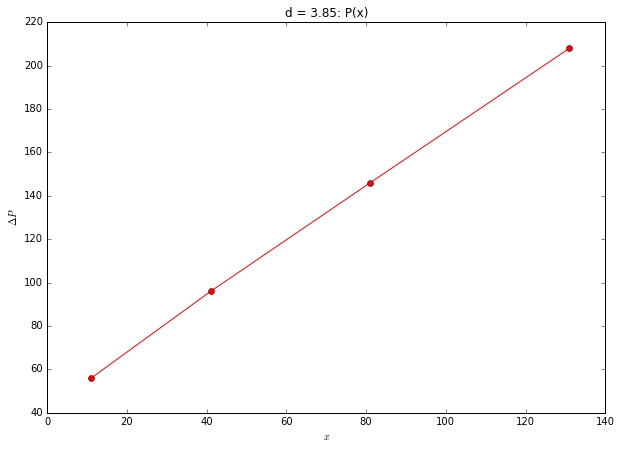

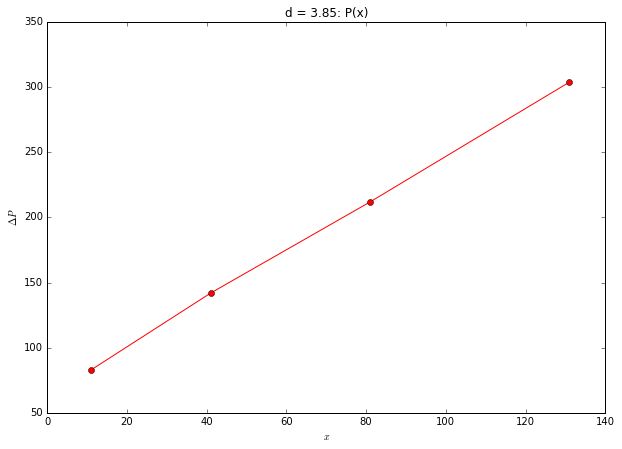

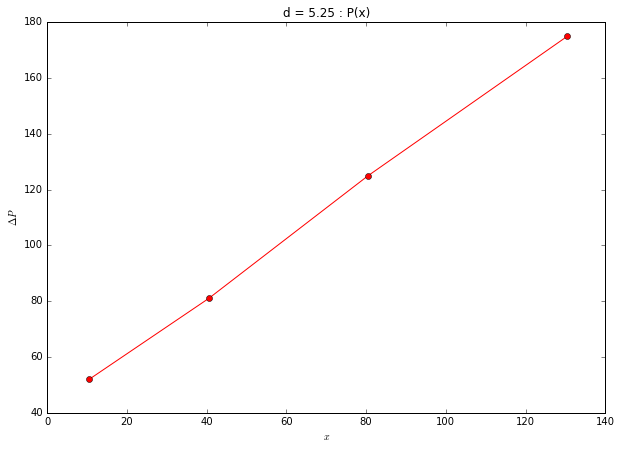

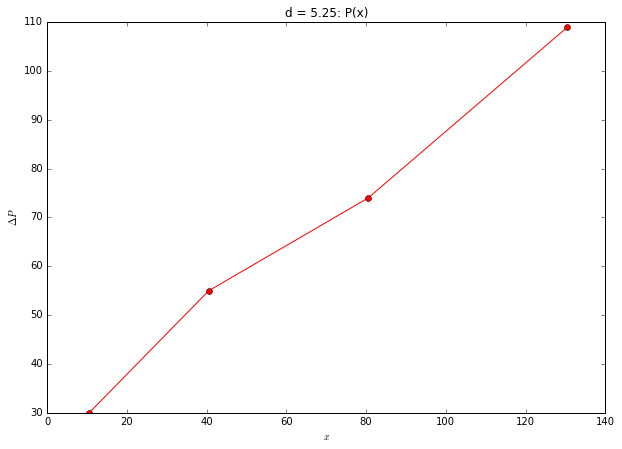

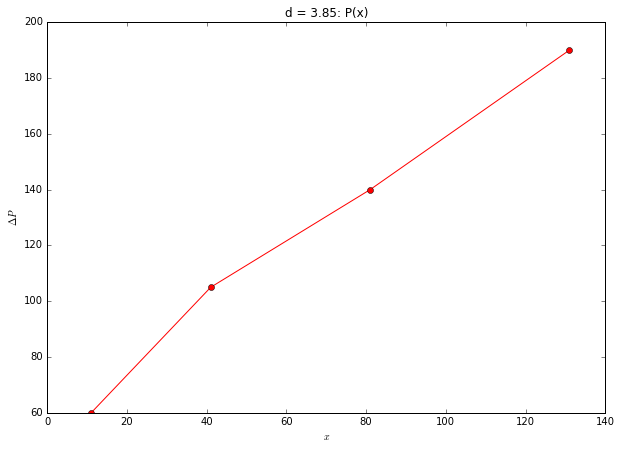

In [345]:
draw(thin_sum, M_thin1_P, 'd = 3.85: P(x)')
draw(thin_sum, M_thin2_P, 'd = 3.85: P(x)')
draw(fat_sum, M_fat_P, 'd = 5.25 : P(x)')
draw(fat_sum, like_fat, 'd = 5.25: P(x)')
draw(thin_sum, like_thin, 'd = 3.85: P(x)')

In [314]:
# на первых 3 графиках везде ламинарно
# на последних двух давление побольше, поэтому заметен переход с турбулентности на ламинарность после первого изгиба